## 三维剖面图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from matplotlib.colors import LightSource
from nice import niceAxis,text3d
from matplotlib.collections import PolyCollection
from matplotlib import cbook
from matplotlib import cm

## 简单例子

活学活用

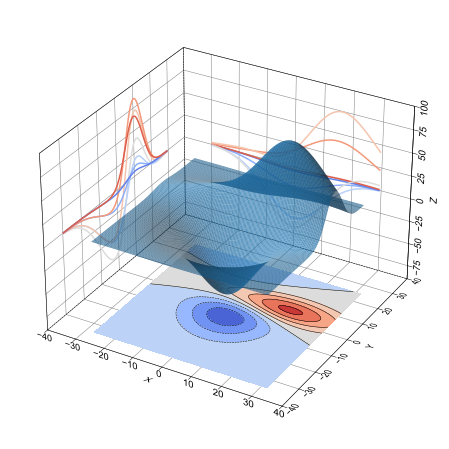

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.7)
# ax.contour3D(X, Y, Z, zdir='z',levels=100,linewidths=1,colors='w')

ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100,colors='k', linewidths=0.5)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-90, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=False,label3D=True,fs_label=0.04,length_major=0.02,length_minor=0.01)

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_3_basic1.pdf')
plt.savefig(fname_fig,transparent=True)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

## 填充表面

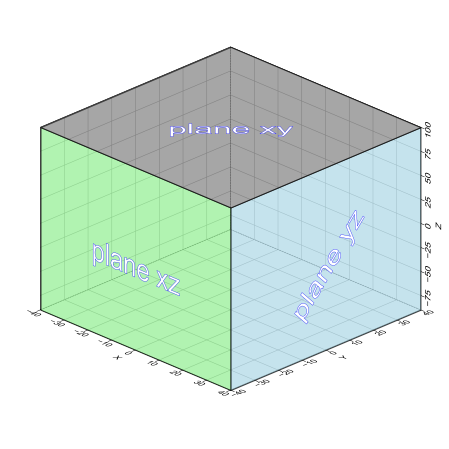

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d',proj_type='ortho') # persp,ortho
X, Y, Z = axes3d.get_test_data(0.05)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-90, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=True,label3D=True,fs_label=0.04,length_major=0.02,length_minor=0.01)

# 添加表面填充
xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]

verts=[[(xmin,ymin),(xmax,ymin),(xmax,ymax),(xmin,ymax),(xmin,ymin)],
       [(xmin,zmin),(xmax,zmin),(xmax,zmax),(xmin,zmax),(xmin,zmin)],
       [(ymin,zmin),(ymax,zmin),(ymax,zmax),(ymin,zmax),(ymin,zmin)]]
for vert,zdir,zs,fc in zip(verts, ['z','y','x'],[zmax,ymin,xmax],['gray','lightgreen','lightblue']):
    poly = PolyCollection([vert], facecolors=fc, alpha=0.7,edgecolors='k')
    ax.add_collection3d(poly, zs=zs, zdir=zdir)
# 三维文字
text3d(ax,(0,ymin,0),'plane xz',size=10,ha='center',va='center',color='w',zdir='y',ec='blue',linewidth=0.3,angle=0)
text3d(ax,(xmax,0,0),'plane yz',size=10,ha='center',va='center',color='w',zdir='x',ec='blue',linewidth=0.3,angle=45)
text3d(ax,(0,0,zmax),'plane xy',size=10,ha='center',va='center',color='w',zdir='z',ec='blue',linewidth=0.3,angle=45)

ax.view_init(elev=25, azim=-45)

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_3_basic2.pdf')
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

## 案例

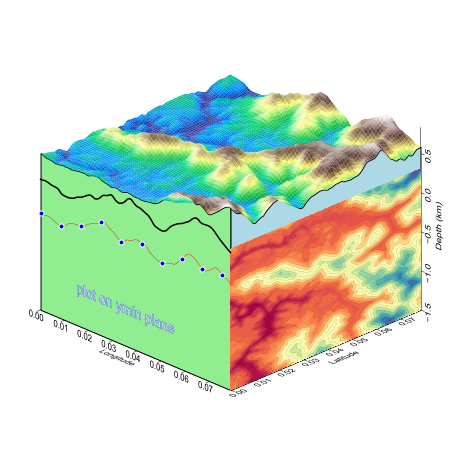

In [4]:
# data
# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)
region = np.s_[5:100, 5:100]
x, y, z = x[region], y[region], z[region]
x,y,z=x-x.min(),y-y.min(),z/1000

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d',proj_type='ortho') # persp,ortho
ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(-1.5,z.max())
# ax.zaxis.set_major_locator(MultipleLocator(0.4))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')
# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=True,label3D=True,fs_label=0.04,length_major=0.02,length_minor=0.01,scaled=False,color_major='None',frame_on=False)

# 1. 绘制地形曲面
ls = LightSource(270, 45)
rgb = ls.shade(z, cmap=cm.terrain, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=True, shade=False)

# 2. 添加表面填充
xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]

verts=[
       [(xmin,zmin),*zip(x[-1,:], z[-1,:]),(xmax,zmin),(xmin,zmin),(xmin,zmin)],
       [(ymin,zmin),(ymax,zmin),*zip(y[:,-1], z[:,-1]),(ymin,zmin)]]
for vert,zdir,zs,fc in zip(verts, ['y','x'],[ymin,xmax],['lightgreen','lightblue']):
    poly = PolyCollection([vert], facecolors=fc, alpha=1,edgecolors='k')
    ax.add_collection3d(poly, zs=zs, zdir=zdir)
    
# 3. 剖面上绘制曲线
ax.plot(x[3,:],z[3,:]-0.3,zs=ymin,color='k',zdir='y',zorder=100)
ax.plot(x[10,:],z[10,:]-0.7,zs=ymin,color='r',marker='o',markevery=10,ms=5,mfc='b',mec='w',linewidth=0.4,zdir='y',zorder=100)

# 4. 剖面上绘制等值线
# 造数据
data=(z.copy()-z.min())/(z.max()-z.min())/100
Y = np.linspace(ymin+1e-6, ymax, data.shape[0])
Z = np.linspace(zmin, 0.3, data.shape[1])
Y,Z = np.meshgrid(Y,Z)
ax.contourf(X=data,Y=Y,Z=Z,offset=xmax,zdir='x',cmap='Spectral',levels=50) # 划重点：对于绘制非坐标的数据时， (1)必须有offset；（2）data应该与zdir对应
ax.contour(X=data,Y=Y,Z=Z,offset=xmax,zdir='x',levels=10,colors='k',linewidths=0.1) 

# 5. 三维文字
text3d(ax,(0.035,y.min(),-1),'plot on ymin plane',size=0.005,ha='center',va='center',color='w',zdir='y',ec='blue',linewidth=0.3,angle=0)
# text3d(ax,(xmax,0,0),'plane yz',size=10,ha='center',va='center',color='w',zdir='x',ec='blue',linewidth=0.3,angle=45)
# text3d(ax,(0,0,zmax),'plane xy',size=10,ha='center',va='center',color='w',zdir='z',ec='blue',linewidth=0.3,angle=45)

ax.view_init(elev=25, azim=-45)

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_3_example2.pdf')
plt.savefig(fname_fig,transparent=True)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()